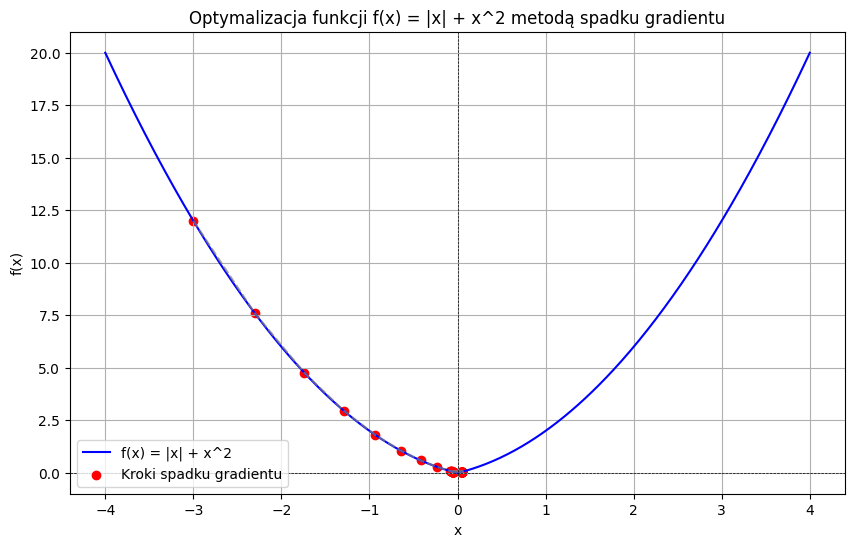

Wartość optymalna x: -0.055555555593980344
Wartość funkcji w minimum f(x): 0.05864197535133618


In [4]:
# 1. Zrealizuj w Pythonie optymalizację funkcji metodą spadku gradientu wraz z wizualizacją.
# Wariant drugi, funkcja: f(x) = |x| + x^2 metoda˛ spadku gradientu i wizualizacja procesu. 

import numpy as np
import matplotlib.pyplot as plt

def f(x): # Funkcja celu
    return np.abs(x) + x**2

def gradient(x): # Gradient funkcji celu
    return 1 + 2*x if x > 0 else -1 + 2*x

def gradient_descent(start_x, learning_rate, tolerance, max_iters): # Spadek gradientu
    x = start_x
    history = [x]
    for _ in range(max_iters):
        grad = gradient(x)
        new_x = x - learning_rate * grad
        history.append(new_x)
        if abs(new_x - x) < tolerance: # Sprawdzanie warunku stopu
            break
        x = new_x
    return x, history

# Parametry algorytmu
start_x = -3.0         # Punkt początkowy
learning_rate = 0.1    # Krok uczenia
tolerance = 1e-6       # Tolerancja
max_iters = 100        # Maksymalna liczba iteracji

optimal_x, history = gradient_descent(start_x, learning_rate, tolerance, max_iters) # Optymalizacja

# Wizualizacja
x_vals = np.linspace(-4, 4, 500)
y_vals = f(x_vals)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) = |x| + x^2', color='blue')
plt.scatter(history, [f(x) for x in history], color='red', label='Kroki spadku gradientu')
plt.plot(history, [f(x) for x in history], linestyle='--', color='gray', alpha=0.7)
plt.title('Optymalizacja funkcji f(x) = |x| + x^2 metodą spadku gradientu')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

print(f"Wartość optymalna x: {optimal_x}")
print(f"Wartość funkcji w minimum f(x): {f(optimal_x)}")


In [5]:
# 2. Zrealizuj w Pythonie najprostsza˛ sieć neuronowa˛ wraz z ewaluacją i prognozowaniem.
# Temat: sieć neuronowa do klasyfikacji binarnej.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Generowanie przykładowych danych binarnych (1000 próbek z dwoma cechami)
np.random.seed(42)
X = np.random.rand(1000, 2)  # wejście
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # etykiety: klasa 1, jeśli suma cech > 1, inaczej klasa 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(4, activation='relu', input_shape=(2,)),  # Warstwa ukryta z 4 neuronami
    Dense(1, activation='sigmoid')  # Warstwa wyjściowa (klasyfikacja binarna)
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Kompilacja modelu

history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0) # Trenownaine

loss, accuracy = model.evaluate(X_test, y_test, verbose=0) # Ewaluacja modelu na danych testowych
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

predictions = (model.predict(X_test) > 0.5).astype(int) # Prognozowanie na podstawie danych testowych

print("\nClassification Report:\n") # Raport klasyfikacji
print(classification_report(y_test, predictions))


new_data = np.array([[0.1, 0.4], [0.8, 0.7]]) # Przykładowe prognozy dla nowych danych
predictions_new = (model.predict(new_data) > 0.5).astype(int)
print("\nNew data predictions:")
print(predictions_new)


c:\Programs\Pythonek\3.11\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Loss: 0.2490, Accuracy: 0.9450
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       106
           1       0.90      1.00      0.94        94

    accuracy                           0.94       200
   macro avg       0.95      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

New data predictions:
[[0]
 [1]]


In [6]:
# 3. Zrealizuj projektowanie, trenowanie i testowanie sieci konwolucyjnej na podstawie jednego z dostępnych w Pythonie podstawowych  zbiorów danych.
# Wariant drugi: Zaprojektuj, wytrenuj i przetestuj sieć konwolucyjną na zbiorze CIFAR-10.

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F  # Dodany import

# Ustawienia urządzenia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Wczytanie zbioru danych CIFAR-10
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

# Definiowanie architektury sieci konwolucyjnej
class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Inicjalizacja modelu, funkcji straty i optymalizatora
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Pętla treningowa
num_epochs = 10
train_losses = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(trainloader)
    train_losses.append(avg_loss)
    print(f'Epoka [{epoch + 1}/{num_epochs}], Strata: {avg_loss:.4f}')

print('Zakończone trenowanie modelu')

# Testowanie modelu
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Dokładność modelu na 10000 testowych obrazach: {100 * correct / total:.2f}%')

# Wizualizacja strat
plt.plot(train_losses)
plt.title('Strata modelu w kolejnych epokach')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.show()

Files already downloaded and verified
Files already downloaded and verified


AssertionError: Torch not compiled with CUDA enabled